# Data Analyst Nanodegree - Project 1 - Weather Trends 


The Folowing notebook is uploaded to https://github.com/sourishpvv/Data_Analyst_NanoDegree.git 

## Step 1 = Data collection

## Step 2 = Data discovery and profiling

In [1]:
# Using Python to understand and process data

#Required python libs

#For Data cleaning and transformation
import pandas as pd
import numpy as np

#For Data visualization
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [2]:
#Importing the csv into dataframe 

df_Global = pd.read_csv (r"C:\Users\souri\Desktop\Jupyter_Notebook_Scripts\Work\Data_Analysis\Project1_Weather_Trends\Global_Data.csv")
df_Local = pd.read_csv (r"C:\Users\souri\Desktop\Jupyter_Notebook_Scripts\Work\Data_Analysis\Project1_Weather_Trends\Germany_Local_data.csv")

In [3]:
df_Global.describe()

,year,avg_temp
count,266.000000,266.000000
mean,1882.500000,8.369474
std,76.931788,0.584747
min,1750.000000,5.780000
25%,1816.250000,8.082500
50%,1882.500000,8.375000
75%,1948.750000,8.707500
max,2015.000000,9.830000


In [4]:
df_Local.describe()

,year,avg_temp
count,813.000000,801.000000
mean,1878.000000,7.265531
std,78.278585,2.118359
min,1743.000000,-2.150000
25%,1810.000000,5.100000
50%,1878.000000,8.000000
75%,1946.000000,8.920000
max,2013.000000,10.960000


## Step3 = Data cleansing.

In [5]:
df_Local = df_Local[(df_Local['year'] >= 1750) & (df_Local['year'] <= 2013)]
df_Global = df_Global[(df_Global['year'] >= 1750) & (df_Global['year'] <= 2013)]
#Check the Max and Min values 
print("Max Year of Local =",df_Local['year'].max(),"Min Year of local=",df_Local['year'].min())
print("Max Year of Global =",df_Global['year'].max(),"Min Year of Global=",df_Global['year'].min())

Max Year of Local = 2013 Min Year of local= 1750
Max Year of Global = 2013 Min Year of Global= 1750


## Step4 = Data transformation

In [6]:
Different_Moving_Averages = {'Moving_Average_for_5Years':5,'Moving_Average_for_10Years':10,'Moving_Average_for_20Years':20}
city_in_germany=['Berlin','Hamburg','Munich']

In [7]:
#Apply 3 different Moving average for Global data
for key in Different_Moving_Averages:
    df_Global[key]  = df_Global['avg_temp'].rolling(window=Different_Moving_Averages[key]).mean()

In [8]:
#Apply 3 different Moving average for Local data
for key in Different_Moving_Averages:
    for city in city_in_germany:
        df_Local[city]  = (df_Local[df_Local['city']==city]['avg_temp'].rolling(window=Different_Moving_Averages[key]).mean())
    for city in city_in_germany:
        df_Local[city] = df_Local[city].fillna(0)
    df_Local[key]= df_Local['Berlin'] + df_Local['Hamburg'] + df_Local['Munich']
df_Local=df_Local.drop(columns =['Berlin', 'Hamburg','Munich'])
df_Local = df_Local.replace(0,np.nan)

## Step5 = Data visualization

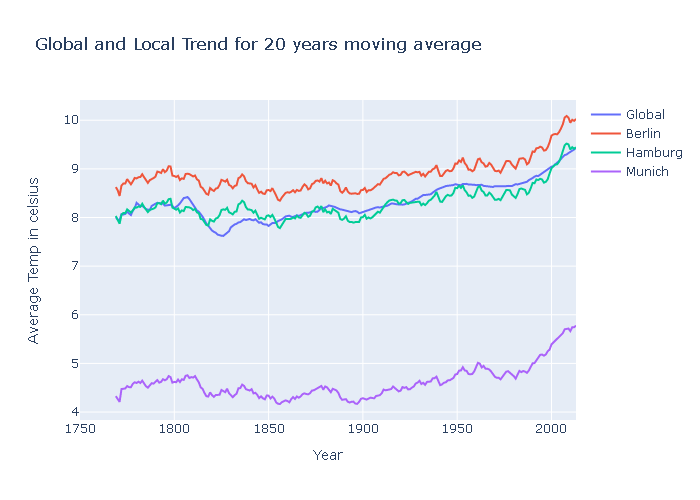

In [9]:
#Plot Moving_Average_for_20Years for Global and Local Data 

fig = make_subplots(rows=1, cols=1,shared_yaxes=False,shared_xaxes=True)
fig.add_trace(go.Scatter(x=df_Global['year'], y=df_Global["Moving_Average_for_20Years"],mode='lines',name="Global"), row=1, col=1)
fig.add_trace(go.Scatter(x=df_Local[df_Local['city']=='Berlin']['year'], y=df_Local[df_Local['city']=='Berlin']["Moving_Average_for_20Years"],mode='lines',name="Berlin"), row=1, col=1)
fig.add_trace(go.Scatter(x=df_Local[df_Local['city']=='Hamburg']['year'], y=df_Local[df_Local['city']=='Hamburg']["Moving_Average_for_20Years"],mode='lines',name="Hamburg"), row=1, col=1)
fig.add_trace(go.Scatter(x=df_Local[df_Local['city']=='Munich']['year'], y=df_Local[df_Local['city']=='Munich']["Moving_Average_for_20Years"],mode='lines',name="Munich"), row=1, col=1)

fig.update_layout(title_text="Global and Local Trend for 20 years moving average")
fig.update_yaxes(title_text="Average Temp in celsius", row=1, col=1)
fig.update_xaxes(title_text="Year", row=1, col=1)
fig.show(renderer="png")

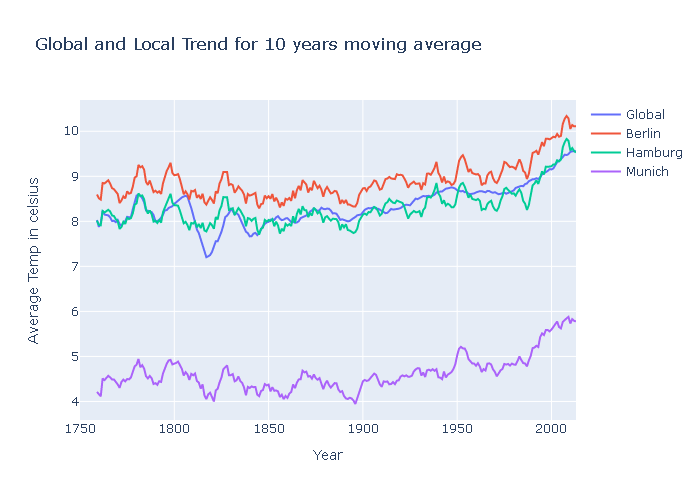

In [10]:
#Plot Moving_Average_for_10Years for Global and Local Data 

fig = make_subplots(rows=1, cols=1,shared_yaxes=False,shared_xaxes=True)
fig.add_trace(go.Scatter(x=df_Global['year'], y=df_Global["Moving_Average_for_10Years"],mode='lines',name="Global"), row=1, col=1)
fig.add_trace(go.Scatter(x=df_Local[df_Local['city']=='Berlin']['year'], y=df_Local[df_Local['city']=='Berlin']["Moving_Average_for_10Years"],mode='lines',name="Berlin"), row=1, col=1)
fig.add_trace(go.Scatter(x=df_Local[df_Local['city']=='Hamburg']['year'], y=df_Local[df_Local['city']=='Hamburg']["Moving_Average_for_10Years"],mode='lines',name="Hamburg"), row=1, col=1)
fig.add_trace(go.Scatter(x=df_Local[df_Local['city']=='Munich']['year'], y=df_Local[df_Local['city']=='Munich']["Moving_Average_for_10Years"],mode='lines',name="Munich"), row=1, col=1)

fig.update_layout(title_text="Global and Local Trend for 10 years moving average")
fig.update_yaxes(title_text="Average Temp in celsius", row=1, col=1)
fig.update_xaxes(title_text="Year", row=1, col=1)
fig.show(renderer="png")

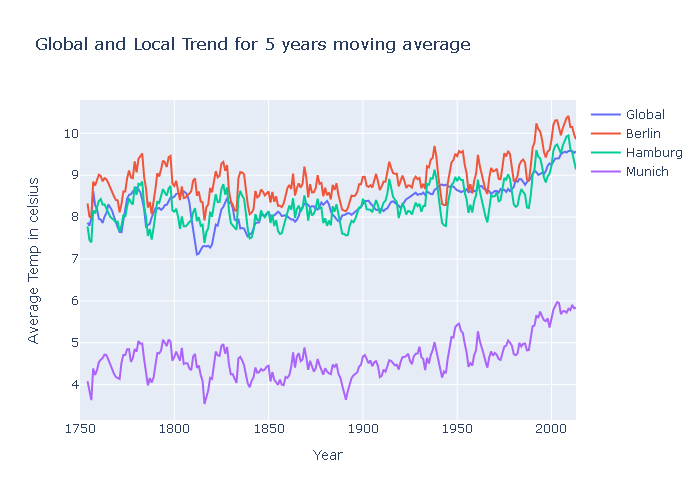

In [11]:
#Plot Moving_Average_for_5Years for Global and Local Data 

fig = make_subplots(rows=1, cols=1,shared_yaxes=False,shared_xaxes=True)
fig.add_trace(go.Scatter(x=df_Global['year'], y=df_Global["Moving_Average_for_5Years"],mode='lines',name="Global"), row=1, col=1)
fig.add_trace(go.Scatter(x=df_Local[df_Local['city']=='Berlin']['year'], y=df_Local[df_Local['city']=='Berlin']["Moving_Average_for_5Years"],mode='lines',name="Berlin"), row=1, col=1)
fig.add_trace(go.Scatter(x=df_Local[df_Local['city']=='Hamburg']['year'], y=df_Local[df_Local['city']=='Hamburg']["Moving_Average_for_5Years"],mode='lines',name="Hamburg"), row=1, col=1)
fig.add_trace(go.Scatter(x=df_Local[df_Local['city']=='Munich']['year'], y=df_Local[df_Local['city']=='Munich']["Moving_Average_for_5Years"],mode='lines',name="Munich"), row=1, col=1)


fig.update_layout(title_text="Global and Local Trend for 5 years moving average")
fig.update_yaxes(title_text="Average Temp in celsius", row=1, col=1)
fig.update_xaxes(title_text="Year", row=1, col=1)
fig.show(renderer="png")

## Step6 = Final Observation